<a href="https://colab.research.google.com/github/Aymando10/Data_Science_Health_Informatics/blob/main/Data_Science_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn & Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

# Imbalanced Learning (SMOTE)
from imblearn.over_sampling import SMOTE
from collections import Counter
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Datasets/SurveyLungCancer.csv'
df = pd.read_csv(file_path)

In [ ]:
df.columns = df.columns.str.strip()

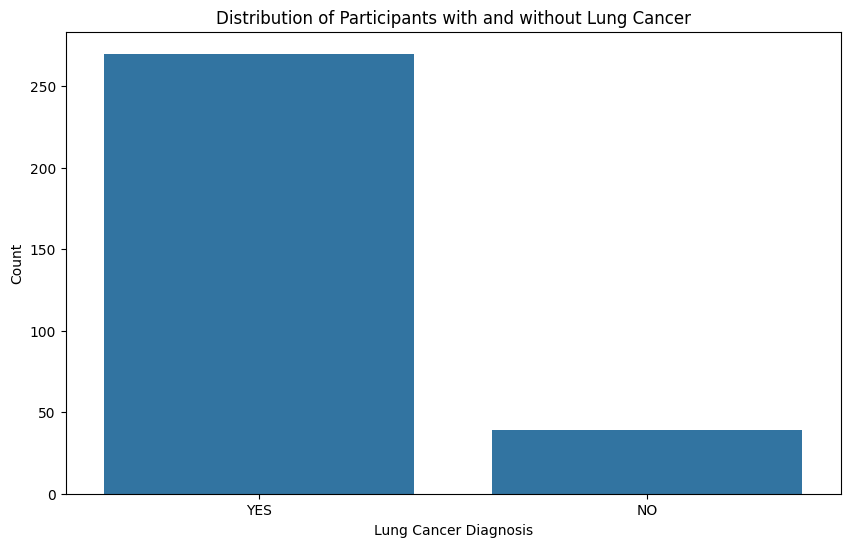

In [ ]:
# Distribution of Participants with and without Lung Cancer
plt.figure(figsize=(10, 6))
sns.countplot(x='LUNG_CANCER', data=df)
plt.title('Distribution of Participants with and without Lung Cancer')
plt.xlabel('Lung Cancer Diagnosis')
plt.ylabel('Count')
plt.show()

In [ ]:
# Make sure column names are stripped
df.columns = df.columns.str.strip()

categorical_cols = [
    'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
    'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
    'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]

print("\nChi-Square Test Results (feature vs LUNG_CANCER):\n")

chi_results = []

for col in categorical_cols:
    table = pd.crosstab(df[col], df['LUNG_CANCER'])
    chi2, p, dof, exp = chi2_contingency(table)
    chi_results.append((col, chi2, p))
    print(f"{col:25s}  chi2={chi2:.2f}  p={p:.5f}")

chi_df = pd.DataFrame(chi_results, columns=['Feature', 'Chi2', 'p_value'])
display(chi_df.sort_values('p_value'))



Chi-Square Test Results (feature vs LUNG_CANCER):

SMOKING                    chi2=0.72  p=0.39532
YELLOW_FINGERS             chi2=9.09  p=0.00257
ANXIETY                    chi2=5.65  p=0.01747
PEER_PRESSURE              chi2=9.64  p=0.00190
CHRONIC DISEASE            chi2=3.16  p=0.07541
FATIGUE                    chi2=6.08  p=0.01366
ALLERGY                    chi2=31.24  p=0.00000
WHEEZING                   chi2=17.72  p=0.00003
ALCOHOL CONSUMING          chi2=24.01  p=0.00000
COUGHING                   chi2=17.61  p=0.00003
SHORTNESS OF BREATH        chi2=0.79  p=0.37392
SWALLOWING DIFFICULTY      chi2=19.31  p=0.00001
CHEST PAIN                 chi2=10.08  p=0.00150


,Feature,Chi2,p_value
6,ALLERGY,31.238952,2.281422e-08
8,ALCOHOL CONSUMING,24.005406,9.606559e-07
11,SWALLOWING DIFFICULTY,19.307277,1.112814e-05
7,WHEEZING,17.723096,2.555055e-05
9,COUGHING,17.606122,2.717123e-05
12,CHEST PAIN,10.083198,1.496275e-03
3,PEER_PRESSURE,9.641594,1.902201e-03
1,YELLOW_FINGERS,9.088186,2.572659e-03
5,FATIGUE,6.081100,1.366356e-02
2,ANXIETY,5.648390,1.747141e-02


In [ ]:
df.isnull().sum() # No missing values

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
df.duplicated().sum()

np.int64(33)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(276, 16)

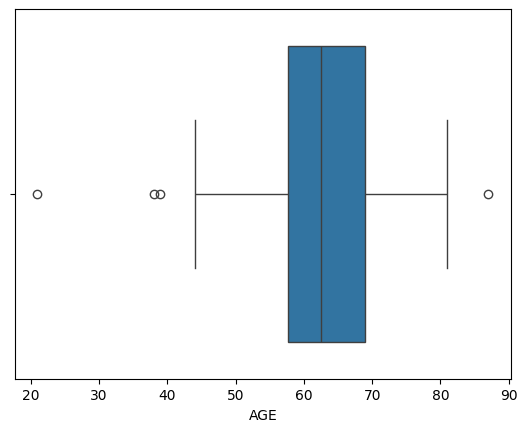

57.75 69.0 11.25


In [ ]:
sns.boxplot(x=df['AGE']);
plt.show()

Q1=df['AGE'].quantile(0.25)
Q3=df['AGE'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

In [ ]:
le = LabelEncoder()

In [ ]:
GENDER = le.fit_transform(df['GENDER'])
LUNG_CANCER = le.fit_transform(df['LUNG_CANCER'])

In [ ]:
df['GENDER'] = GENDER
df['LUNG_CANCER'] = LUNG_CANCER

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


# Test Train Split

In [ ]:
X = df.drop(columns=['LUNG_CANCER'], axis=1)
y = df['LUNG_CANCER']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

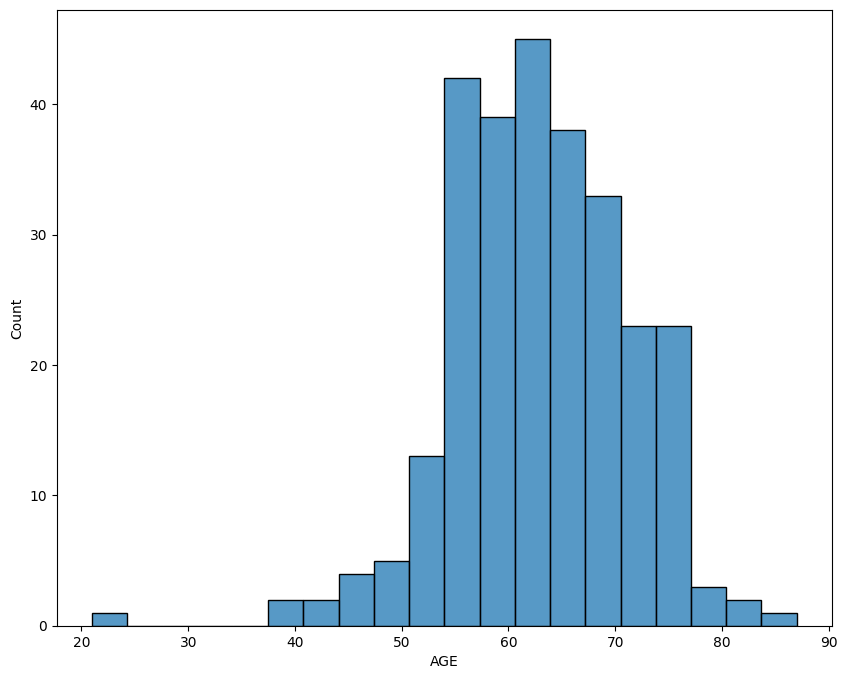

In [ ]:
#Lung cancer comparison with age
lung_cancer=df[df['LUNG_CANCER']==1]
plt.figure(figsize=(10,8))
sns.histplot(lung_cancer,x=df['AGE'],bins=20)
plt.show()

# Synthetic Minority Over-Sampling

In [ ]:
print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_resampled))

Original dataset shape Counter({1: 194, 0: 26})
Resampled dataset shape Counter({1: 194, 0: 194})


# XGBoost Prediction

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, max_depth=3, learning_rate=0.05, random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.96      0.98      0.97        44

    accuracy                           0.95        56
   macro avg       0.93      0.91      0.92        56
weighted avg       0.95      0.95      0.95        56



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [23:32:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
